# Demo Notebook: MLC $C$ Parametrizations

## Import and Set-Up

First, we must import all the relevant libraries.

In [1]:
## General imports ##
# Used for selecting GPU.
import os
import tensorflow as tf

# Used for distributions libraries.
from scipy import stats

## Utility imports ##
from utils.losses import *
from utils.plotting import *
from utils.training import *

# Just this seed isn't enough to ensure results are completely replicable,
# as there is randomness in GPU execution.
np.random.seed(666)

In [2]:
# This cell is to select the GPU.
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-07-07 15:46:12.685108: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-07-07 15:46:12.710453: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-07-07 15:46:12.710623: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-07-07 15:46:12.711973: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-07-07 15:46:12.713542: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-07-07 15:46:12.713752: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2

## Data Generation

We first set up the data distributions as well as various other aspects of the training.

[Add more about $C$ parametrizations here]

In [3]:
## Mess around with these inputs.

# The trained models will be saved in a folder "set_{num}"
num = 0

# The number of models to train for each parametrization.
reps = 10

# The background and signal distributions.
bkgd = stats.norm(-0.1, 1)
sgnl = stats.norm(+0.1, 1)
lr = make_lr(bkgd, sgnl)

# The sample size (N samples are drawn from each distribution for training).
N = 10**6

In [4]:
# Model parameters
linear = {'loss':mlc, 'output':'relu'}
square = {'loss':square_mlc, 'output':'linear'}
exponl = {'loss':exp_mlc, 'output':'linear'}

filestr_linear = 'models/demo/set_' + str(num) + '/linear/model_{}.h5'
filestr_square = 'models/demo/set_' + str(num) + '/square/model_{}.h5'
filestr_exponl = 'models/demo/set_' + str(num) + '/exponl/model_{}.h5'

if not os.path.isdir('models/demo/set_' + str(num)):
    os.makedirs('models/demo/set_' + str(num))
    os.makedirs('models/demo/set_' + str(num) + '/linear')
    os.makedirs('models/demo/set_' + str(num) + '/square')
    os.makedirs('models/demo/set_' + str(num) + '/exponl')
    os.makedirs('plots/demo/set_' + str(num))

## Data Generation
data = make_data(bkgd, sgnl, N) + [N]

## Training

We train ```reps``` models of each parametrization of the MLC loss.

In [5]:
for i in range(reps):
    print(i, end = ' ')
    linear_model, linear_trace = train(data, **linear)
    linear_model.save_weights(filestr_linear.format(i))
    square_model, square_trace = train(data, **square)
    square_model.save_weights(filestr_square.format(i))
    exponl_model, exponl_trace = train(data, **exponl)
    exponl_model.save_weights(filestr_exponl.format(i))
    print()

0 

2022-07-07 15:46:12.960814: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-07-07 15:46:12.967748: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2994530000 Hz
2022-07-07 15:46:12.968852: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56467c8adc40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-07-07 15:46:12.968878: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-07-07 15:46:13.070216: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56467c917b30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-07-07 15:46:13.070265: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
2022-07-07 15:46:13.071891: I 

-0.009794402867555618 	 28	-0.0023509985767304897 	 83	-0.009916472248733044 	 19	
1 -0.00997310783714056 	 53	0.00048753127339296043 	 93	-0.010017742402851582 	 12	
2 -0.010003743693232536 	 32	-0.009968284517526627 	 56	-0.009815579280257225 	 13	
3 -0.009940428659319878 	 46	-0.009364648722112179 	 45	-0.010114324279129505 	 33	
4 -0.010077611543238163 	 65	-0.009796308353543282 	 42	-0.010059519670903683 	 11	
5 -0.009960294701159 	 47	-0.003650933038443327 	 100	-0.009988175705075264 	 15	
6 -0.009959579445421696 	 49	-0.009859033860266209 	 36	-0.010079512372612953 	 15	
7 -0.009930679574608803 	 46	-0.009078631177544594 	 33	-0.010016086511313915 	 12	
8 -0.010120532475411892 	 55	-0.009727000258862972 	 33	-0.010006393305957317 	 13	
9 -0.01007347647100687 	 44	-0.009944045916199684 	 42	-0.009915627539157867 	 12	


Once all the models are trained, we load them back in and create a likelihood ratio function from each one.

In [6]:
# Get model likelihood ratios.
lrs_linear = [None] * reps
lrs_square = [None] * reps
lrs_exponl = [None] * reps
for i in range(reps):
    model_linear = create_model(**linear)
    model_linear.load_weights(filestr_linear.format(i))
    model_square = create_model(**square)
    model_square.load_weights(filestr_square.format(i))
    model_exponl = create_model(**exponl)
    model_exponl.load_weights(filestr_exponl.format(i))
    
    lrs_linear[i] = pure_lr(model_linear)
    lrs_square[i] = square_lr(model_square)
    lrs_exponl[i] = exp_lr(model_exponl)

## Visualization

Once we have the model likelihood ratios, we can average together all ```reps``` of our predictions and predict them against the true likelihood ratio.

In [7]:
m = (bkgd.mean() + sgnl.mean()) / 2
s = ((bkgd.var() + sgnl.var()) / 2 + np.var([bkgd.mean(), sgnl.mean()]))**0.5

In [8]:
# Get average predictions and errors. Add on the labels for plotting.
ds = np.linspace(-6, 6, 1000)
xs = (ds - m) / s

lr_linear = avg_lr(get_preds(lrs_linear, xs)) + ('MLC (linear)',)
lr_square = avg_lr(get_preds(lrs_square, xs)) + ('MLC (square)',)
lr_exponl = avg_lr(get_preds(lrs_exponl, xs)) + ('MLC (exponential)',)

lrr_linear = avg_lrr(lr, get_preds(lrs_linear, xs), ds) + ('MLC (linear)',)
lrr_square = avg_lrr(lr, get_preds(lrs_square, xs), ds) + ('MLC (square)',)
lrr_exponl = avg_lrr(lr, get_preds(lrs_exponl, xs), ds) + ('MLC (exponential)',)

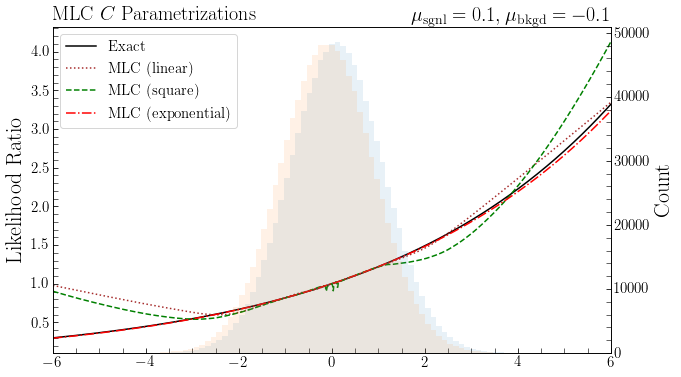

In [9]:
lr_plot([lr_linear, lr_square, lr_exponl], 
        lr,
        bkgd, sgnl,
        xs = ds,
        bins = np.linspace(-6, 6, 100),
        title = r'MLC $C$ Parametrizations',
        filename = 'plots/demo/set_{}/lrs.png'.format(num),
        params = r"$\mu_{\rm{sgnl}}="+str(+0.1)+r", \mu_{\rm{bkgd}}="+str(-0.1)+r"$")

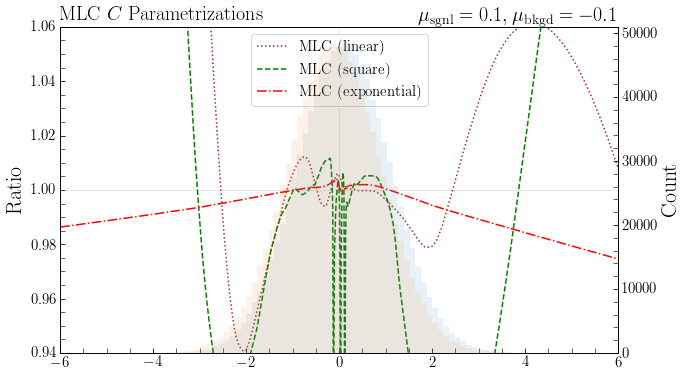

In [10]:
lrr_plot([lrr_linear, lrr_square, lrr_exponl], 
         lr,
         bkgd, sgnl,
         xs = ds,
         bins = np.linspace(-6, 6, 100),
         title = r'MLC $C$ Parametrizations',
         filename = 'plots/demo/set_{}/lrrs.png'.format(num),
         params = r"$\mu_{\rm{sgnl}}="+str(+0.1)+r", \mu_{\rm{bkgd}}="+str(-0.1)+r"$")